# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "toute", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "à", "alors", "bon", 
       "auquel", "aucun", "avec", "ça", "car", "ceux", "certes", "ci", "etant", "façon",
       "hein", "hélas", "fois", "hors", "juste", "mais", "malgré", "néanmoins", "peu",
       "on", "où", "ouf", "allo", "oust", "outre", "oh", "pff", "plein", "pif", "plouf",
       "quelque", "sans", "sapristi", "rien", "sa", "seulement", "si", "sur", "voici",
       "tél", "telle", "très", "toujours", "tenant", "tandis", "tac", "toc", "toi", "vif",
       "prés", "fort", "celui", "conf", "jamais", "bonjour", "ans", "nouvelle", "villa", "etc",
       "gar", "partie", "celui", "bat", "déjà", "plusieurs", "mod", "lux", "dès", "mal", "marché",
       "quelques", "fin", "culs", "match", "jour", "petit", "homme", "femme", 'jour', "ordre", "fille",
       "trav", "bonne", "enfin", "début", "âge", "faç", "appart", "vis", "mise", "main", "app", 
       "prix", "point", "réf", "chez"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [3]:
# Choisir une année
year = 1960

In [4]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [5]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [6]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [7]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

"ia« le som ÏJsIne MéuhMrïiqii S.AT'BBirîï^^ J00, r. Merlu» Duché, Vllvorde ch. STENO-DACTYLO élément de let ordre, bilingue, bon- i ne rémunération. Situation d’avenir, i Candidat, A soumet par écrit "

In [8]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [9]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

'ia« le som ÏJsIne MéuhMrïiqii S.AT\'BBirîï^^ J00, r. Merlu» Duché, Vllvorde ch. STENO-DACTYLO élément de let ordre, bilingue, bon- i ne rémunération. Situation d’avenir, i Candidat, A soumet par écrit 130221H PORTANTE 80C.BRUXELL0I8I cherche pour entrée Immédiate Secrétaire Sténo-Dactylo 3 françalee - 1 an d\'expérience, al tuât h «table - semaine de 5 Jours. Ecrire é cur. vit et prêt Ag. Rossel 02983 H "âociËTS\'Importante de sa pi* demande 1 Sténo-Dactylo bilingue débutante. - Se présenter : 151.'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [10]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [11]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1960_clean.txt!'

In [12]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'SOM ÏJSINE MÉUHMRÏIQII BBIRÎÏ MERLU DUCHÉ VLLVORDE STENO DACTYLO ÉLÉMENT LET BILINGUE RÉMUNÉRATION SITUATION AVENIR CANDIDAT SOUMET ÉCRIT PORTANTE CHERCHE ENTRÉE IMMÉDIATE SECRÉTAIRE STÉNO DACTYLO FRANÇALEE EXPÉRIENCE TUÂT TABLE SEMAINE JOURS ECRIRE CUR VIT PRÊT ÂOCIËTS IMPORTANTE DEMANDE STÉNO DACTYLO BILINGUE DÉBUTANTE PRÉSENTER RUE STALLE UCCLE IMPORTANTE CLE DELCO ASSURANCES DEMANDE INSPECTEUR PRODUCTEUR ACELDENTE INEENDLE VIE AGE RÉSIDENCE OBLIGATOIRE AJOST AUDENAERDE ENVIRONS APPOINTEMENTS'

## Nuage de mots

### Afficher les termes les plus fréquents


In [13]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('RUE', 1563), ('BRUXELLES', 1112), ('DEMANDE', 426), ('PLACE', 412), ('ECR', 394), ('BRUX', 386), ('GRAND', 384), ('SOIR', 379), ('ECRIRE', 374), ('MAISON', 357)]


### Créer, stocker et afficher le nuage de mots

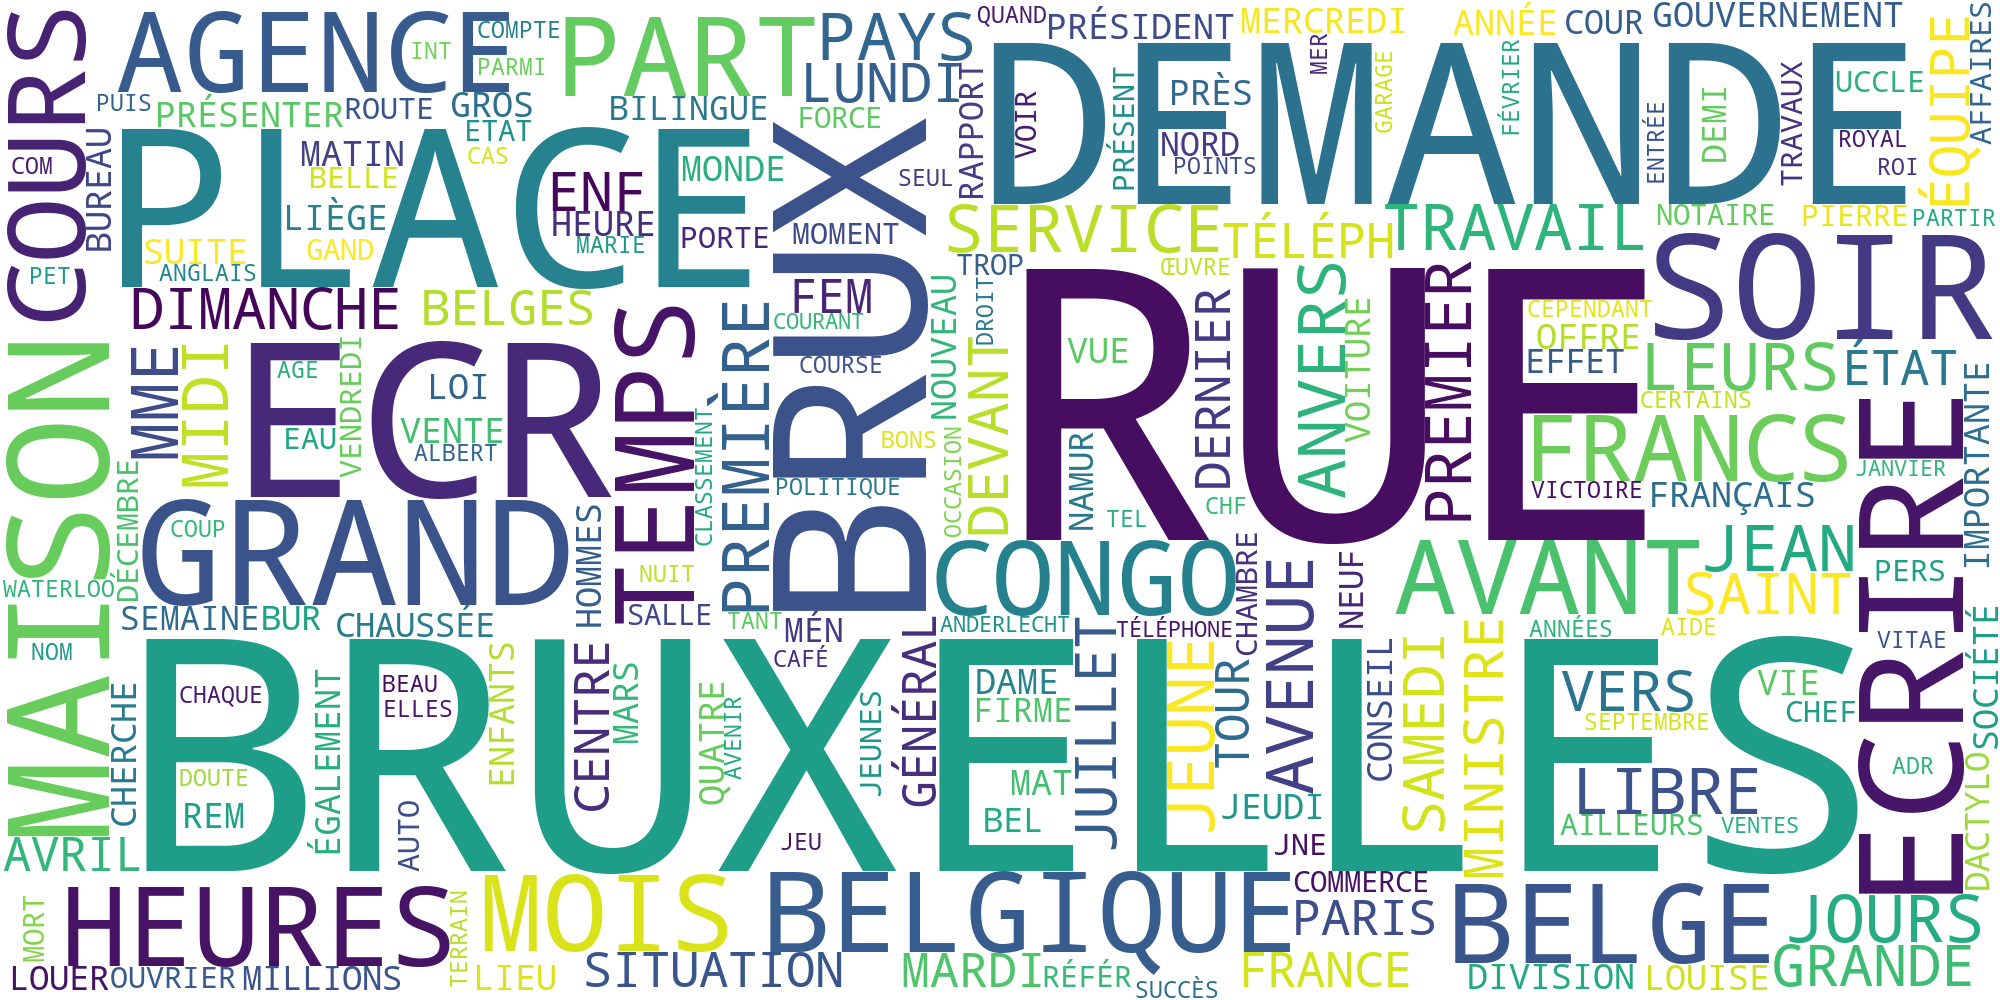

In [14]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))